    Authors:    Mingjie Ye, yemj1017@gmail.com, (+34)658745860
                Luqi Guan, estela96guan@gmail.com, (+34)655061067
    

# Introduction
Every businessmen including this bakery desire higher profits. There are two ways to gain profits: increasing revenues and decreasing expenses. Considering the relatively low-cost products, it is better to increase the sales by setting competitive prices in order to increase revenues. Given the dataset of transactions of a bakery from 30/10/2016 to 09/04/2017, we set our business goals, do analysis and data mining, therefore propose some advisable staregies according to the results. Finally, we estimate the increaced profits and loss based on hypothesis because do not have enough information about the bakery except transactions.

# Business goal
The utimate goal of the bakery is to increase profits, namely to increase revenues and to reduce expenses. In order to raise revenues, we decide to boost sales rather than increasing prices because the products such as bread and coffee are price-sensitive. Details about our strategies will be illustrated in the analysis part below. 

# Data analysis and business strategies 
We choose python as our analysis tool because of the following reasons:
1. This is not a big data problem, the scale of data is acceptable with python. So we don't need big data tools in this project.
2. The significant factor of choosing Python is the variety of data science libraries such as pandas, numpy, matplotlib and seaborn.
3. The widespread and involved community promotes easy access for us to find different solutions of similar problems.
4. Data visualization in python is beautiful and easy to operate.
5. We are familiar with python.

## Inspect our dataset
Import libraries and files as Bak.
See the structure and head.

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
# import the data
Bak=pd.read_csv('./input/BreadBasket_DMS.csv')
Bak.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


Drop NONE values and create new columns representing Year, Month, Day and Hour by Column "Date". New head is showed below.

In [17]:
# Inspect the data
Bak.loc[Bak['Item']=='NONE',:].head()
Bak.loc[Bak['Item']=='NONE',:].count()
# Drop none values from the dataset
Bak=Bak.drop(Bak.loc[Bak['Item']=='NONE'].index)
Bak['Year'] = Bak.Date.apply(lambda x:x.split('-')[0])
Bak['Month'] = Bak.Date.apply(lambda x:x.split('-')[1])
Bak['Day'] = Bak.Date.apply(lambda x:x.split('-')[2])
Bak['Hour'] =Bak.Time.apply(lambda x:int(x.split(':')[0]))
#df = df.drop(columns='Time')
Bak.head()

,Date,Time,Transaction,Item,Year,Month,Day,Hour
0,2016-10-30,09:58:11,1,Bread,2016,10,30,9
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30,10
4,2016-10-30,10:07:57,3,Jam,2016,10,30,10


In [6]:
print('Total number of Items sold at the bakery is:',Bak['Item'].nunique())
print('Ten Most Sold Items At The Bakery')
print(Bak['Item'].value_counts().head(10))

Total number of Items sold at the bakery is: 94
Ten Most Sold Items At The Bakery
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64


Show the barplot of 20 most sold items at the Bakery. We could find that coffee is the most popular item followed by bread, tea and cake.

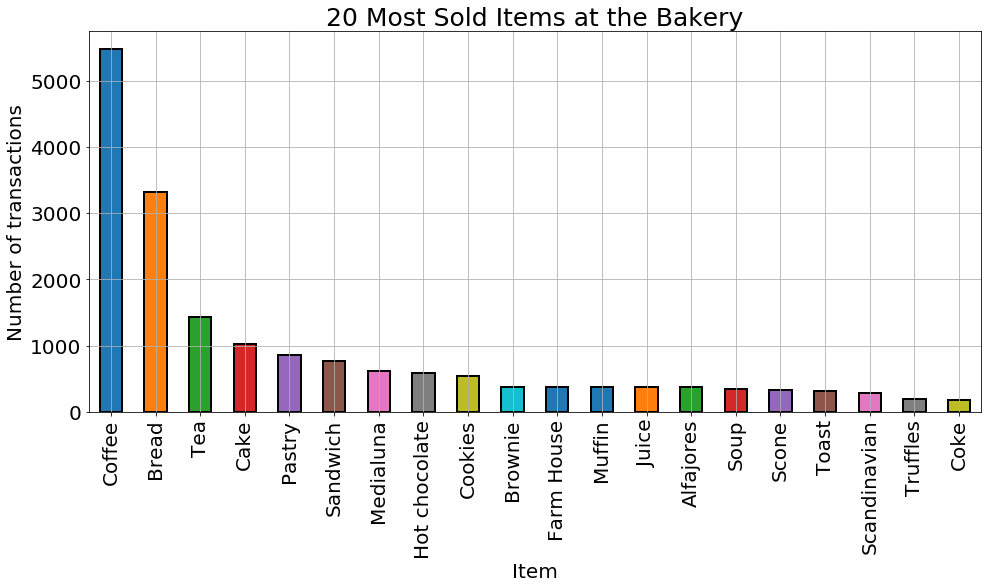

In [18]:
fig, ax=plt.subplots(figsize=(16,7))
Bak['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('20 Most Sold Items at the Bakery',fontsize=25)
plt.grid()
plt.ioff()
plt.show()

## Transactions per hour
As the barplot of transactions per hour, we could find that the transactions generally happen between 8:00 and 18:00, especially around 11 O'clock. It is easy to be explained because people tend to buy the items at the bakery in the morning and at noon. 

Therefore, we could propose our first strategy: **Open hours of the bakery could be reduced to 8:00 - 18:00 so that expenses will decrease. Less employee are required after 16:00.** On the other hand, if the boss of the bakery don't want close the store so early and is willing to expand business, **Offering more types of products which are popular after 18:00 such as salad, beef, noodles, hamburgers is another reasonable option.**

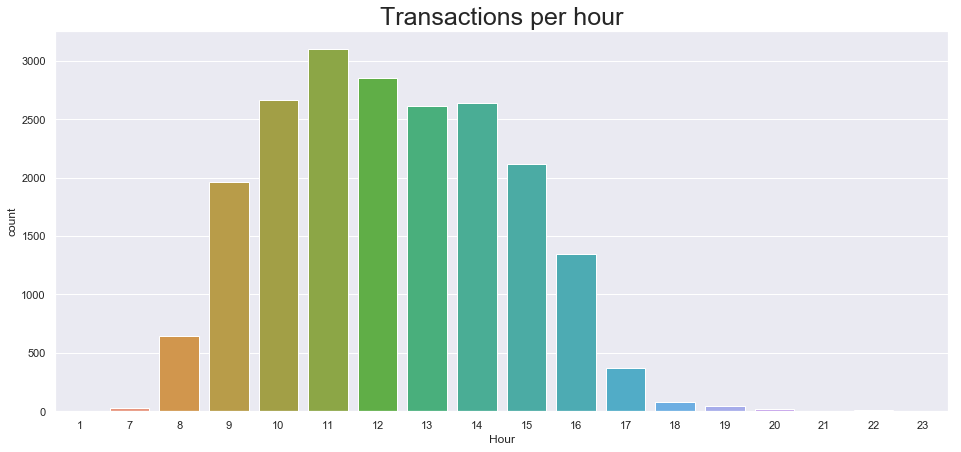

In [92]:
# use sns to plot the counts bar
plt.subplots(figsize=(16,7))
plt.title('Transactions per hour',fontsize=25)
trans_hour = sns.countplot(x="Hour", data=Bak)
plt.show()

## Transactions per month

In [40]:
print(Bak.groupby('Month').nunique())

       Date  Time  Transaction  Item  Year  Month  Day  Hour
Month                                                       
01       30  1531         1575    49     1      1   30    14
02       28  1591         1630    50     1      1   28    15
03       31  1713         1764    52     1      1   31    11
04        9   502          509    49     1      1    9    14
10        2   175          175    30     1      1    2    10
11       30  2069         2140    58     1      1   30    14
12       29  1633         1672    45     1      1   29    14


By checking the information of every months, we know the counts of transactions and Days. Then we draw the barplot of transactions per month. Because of the date of this dataset is from 30/10/2016 to 09/04/2017, April and October are incomplete and considered to be outliers. There are only 9 days' records available in April and 2 in October.

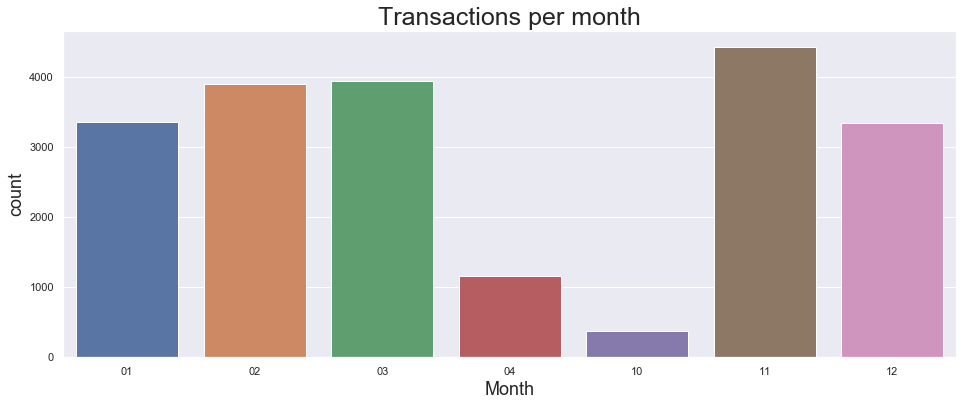

In [93]:
plt.subplots(figsize=(16,6))
plt.xlabel('Months',fontsize=18)
plt.ylabel('Number of transactions per month',fontsize=18)
plt.title('Transactions per month',fontsize=25)
Month_counts = sns.countplot(x="Month", data=Bak)
plt.show()

Considering the number of days in different months, we draw a new plot of transactions per day in different months by dividing the total counts by number of days. As the figure showed below, we could see that the numbers of transactions per day in these months are very close except October and November. The number in October is the largest but there are only two days's records and the confidence we think is low. So October is still a outlier in this figure. However, sales per day in November is obviously larger than others, which means people are more willing to buy something in bakery in November. Therefore, we think **more activities or discounts could come up in this month to attract more customers**.

[52.5, 58.214285714285715, 56.903225806451616, 56.55555555555556, 87.5, 71.33333333333333, 57.6551724137931]


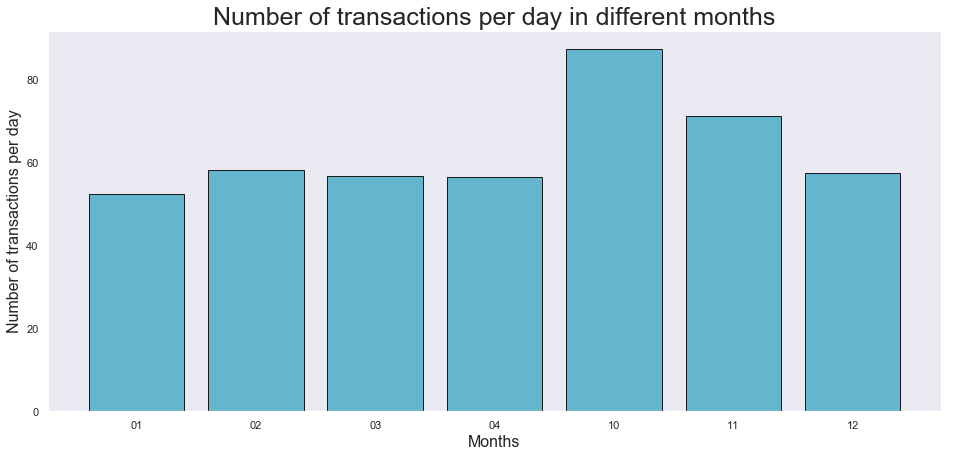

In [112]:
# caculate de transactions per day in every months
list_trans = Bak.groupby('Month')['Transaction'].nunique().tolist()
list_days = Bak.groupby('Month')['Day'].nunique().tolist()
list_trans_per_day = [x / y for x, y in zip(list_trans, list_days)]

print(list_trans_per_day)
months = Bak.groupby('Month').nunique().index.tolist()
fig, Month=plt.subplots(figsize=(16,7))
Month = plt.bar(months,list_trans_per_day, color=['c'], edgecolor='k')
plt.xlabel('Months',fontsize=16)
plt.ylabel('Number of transactions per day',fontsize=16)
plt.title('Number of transactions per day in different months',fontsize=25)
plt.grid()
plt.show()

## Sales on different days of the week

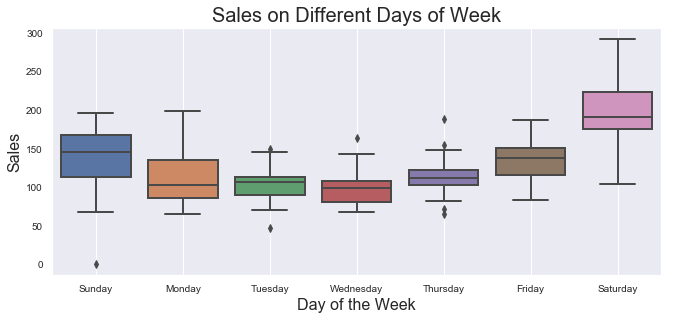

In [132]:
# Sales on different days of the week
Bak1 = Bak.groupby(['Date']).size().reset_index(name='counts')
Bak1['Day'] = pd.to_datetime(Bak1['Date']).dt.day_name()

plt.figure(figsize=(24,10))
plt.subplot(2,2,1)
ax=sns.boxplot(x='Day',y='counts',data=Bak1,width=0.8,linewidth=2)
plt.xlabel('Day of the Week',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.title('Sales on Different Days of Week',fontsize=20)
ax.tick_params(labelsize=10)
plt.grid()
plt.ioff()
plt.show()

The figure shows the difference among days of week. Obviously, sales on weekend is much higher than weekday. As for weekdays, the items sell the most on Friday. This is because people have more times and willings to shop on these days. In order to increase sales, we could draw our strategies from two perspectives: **1. In order to increase the sales on weekday, we could provide more combos for the staff of surrounding companies; 2. In order to increase the sales on weekend, we could offer customers promotional activities, special offers or trial offers.**

## Apriori Algorithm
In order to find the association rules of items in the bakery, we use apriori algorithm with the help of python package mlxtend. 

In [139]:
# apriori
from mlxtend.frequent_patterns import apriori, association_rules
# transfrom data to make items as columns and each transaction as a row and count same Items bought in one transaction but fill other cloumns of the row with 0 to represent item which are not bought.
hot_encoded_Bak=Bak.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
hot_encoded_Bak.head()
hot_encoded_Bak = hot_encoded_Bak.applymap(lambda x: 0 if x<=0 else 1)

# here we choose the min support as 1%
frequent_itemsets = apriori(hot_encoded_Bak, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
5,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910


In [143]:
rules[ (rules['lift'] >= 1.15) & (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582


- Support is an indication of how frequently the item set appears in the data set.
$$supp(X⇒Y)=\frac{|X \cup Y|}{N}$$ 
N means the total number of transactions. 
Obviously, the more support is, the more useful the rule is. However, considering so many types of items and huge scale of transactions in this bakery, the support in our case is relatively low and we need to find an optimal min_support. If we set the threshold too low, we will get a lot of rules and most of them are not so valuable. If we set thethreshold too high, only few rules are available. In order to find the most several valuable rules, we set our threshold as 1%.
- For a rule X⇒Y, **confidence** shows the percentage in which Y is bought with X. It’s an indication of how often the rule has been found to be true. It tells us how likely it is that purchasing X results in a purchase of Y.
$$conf(X⇒Y)=\frac{supp(X \cup Y)}{supp(X)}$$
In our case, we only accept the rules whose confidences are no less than 50%.
- Lift means how likely item Y is purchased when item X is purchased. 
$$lift(X⇒Y)=\frac{supp(X \cup Y)}{supp(X) supp(Y)}$$
A Lift of 1 means there is no association between products X and Y. Lift of greater than 1 means products X and Y are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together. Here, we choose 1.15 as threshold. 
Finally, we get 4 important rules. Therefore, we could **use these association rules by providing menu combo with these two items such as morning combo with toast and a cup of coffee**. 

If this combo strategy works well, it could be expanded with more association rules as the following shows.

In [147]:
rules[ (rules['lift'] >= 1.1) & (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582


## Sales by hour for top 10 items
We have analysed the total transactions per hour above. Now we will analyse this problem in different items. According to the *'Figure: 20 Most Sold Items at the Bakery'*, the total sales mainly remain in the top 10 items, especially the top two items (coffee and bread).

The below figure shows the sales by hour for top 10 items. We could find that the peaks of these items are different: 
1. Some items have two peaks, while others have only one peak or the second peaks are not obvious; 
2. The two peaks generally have the same moments. The first is approximately between 9:00 and 12:00; The second is around 13:00 to 16:00. Combined with the practical situation, it is easy to be explained that these two peaks are exactly the time of brunch and afternoon tea. Therefore, we define these two times as brunch time and afternoon tea time.
3. The items having two peaks (defined as Two-peak Item) are: coffee, brownie, Cookies and hot chocolate.
4. The items having brunch time peaks (defined as First-peak Item) are: bread, medialuna and pastry.
5. The items having afternoon tea time peaks (defined as Second-peak Item) are: cake, sandwich and tea.

The classification of items support our explanation. Bread, medialuna and pastry sell well at brunch time. Cake, sandwich and tea sell well in the afternoon. And the sales of coffee, brownie, cookies and hot chocolate reach the peaks at both of the times. These results conform to our real business.

Inspired by the results and conclusion, we could propose some suggestions to increase the sales:

1. **Rearrange the positions of different items in the right time. For example, at brunch time (9:00-12:00) salesman or saleswoman could place more First-peak Items and Two-peak Items while less Second-peak Items.**
2. **Produce different items in the right time. This is similar with the suggestion 1. Because First-peak Items and Two-peak Items sell better at brunch time, it is sensible to produce more these items and less Second-peak Items at brunch time.**
3. **Give a discount to First-peak Items or place them into combo with other items in the afternoon to ensure that all of the items are sold this day. Because the sales decrease after the first peak according to the figure.** 


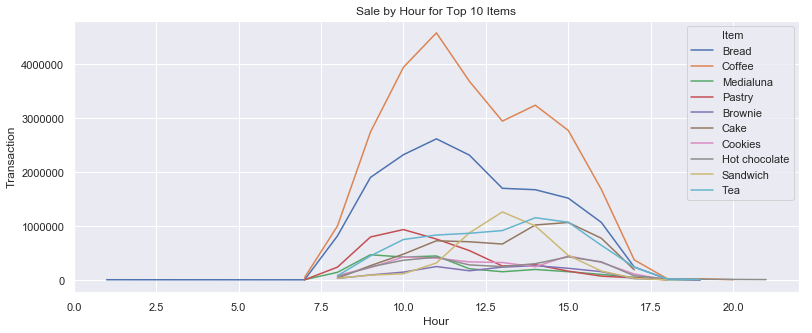

In [150]:
Top_items=Bak['Item'].value_counts().head(10).index.tolist()
Hour_by_Item=Bak[['Hour','Item','Transaction']].groupby(['Hour','Item'],as_index=False).sum()
plt.figure(figsize=[13,5])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sale by Hour for Top 10 Items')
sns.lineplot(x='Hour',y='Transaction',data=Hour_by_Item[Hour_by_Item['Item'].isin(Top_items)],hue='Item')
plt.show()

# Summary
In this project, we set our business goal as 'Increase profits'. There are two ways: increasing revenues and reducing expenses. Increasing revenues will be the mainly approach. Considering the business pattern and low-cost items in bakery, the way to increase revenues is mainly by increasing sales.

Given the dataset, we chose python as our data analysis and data mining tools, then analysed the transactions per hour, transactions per month and sales on different days of the week. Plenty of valuable strategies were proposed with the analysis. In order to check if there is any association rules, we used apriori algorithm and got some rules followed one strategy. Finally, we came into different items to see the sales of them in different hours. The difference among variable items were obvious, so we classified them into three different categories based on the peak of sales curve: Two-peak Item, First-peak Item and Second-peak Item. Meanwhile several detailed suggestions were proposed.

All the **10 strategies** we proposed in this project are as follows:

1. **Open hours of the bakery could be reduced to 8:00 - 18:00 so that expenses will decrease.**
2. **Less employee are required after 16:00.**
3. **If the boss of the bakery don't want close the store so early and is willing to expand business, Offering more types of products which are popular after 18:00 such as salad, beef, noodles, hamburgers is another reasonable option.**
4. **More activities or discounts could come up in November to attract more customers.**
5. **In order to increase the sales on weekday, we could provide more combos for the staff of surrounding companies.**
6. **In order to increase the sales on weekend, we could offer customers promotional activities, special offers or trial offers.**
7. **Use the listed association rules by providing menu combo with these two items such as morning combo with toast and a cup of coffee. If this combo strategy works well, it could be expanded with more association rules as the following shows.**
8. **Rearrange the positions of different items in the right time. For example, at brunch time (9:00-12:00) salesman or saleswoman could place more First-peak Items and Two-peak Items while less Second-peak Items.**
9. **Produce different items in the right time. This is similar with the suggestion 1. Because First-peak Items and Two-peak Items sell better at brunch time, it is sensible to produce more these items and less Second-peak Items at brunch time.**
10. **Give a discount to First-peak Items or place them into combo with other items in the afternoon to ensure that all of the items are sold this day. Because the sales decrease after the first peak according to the figure.**